In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import statsmodels.formula.api as smf
import statsmodels
import statsmodels.api as sm

In [29]:
light = pd.read_csv("light1.csv")

In [30]:
light.columns

Index(['id', 'ward', 'accident', 'crimes', 'person', 'density', 'IMD', 'NEET',
       'unemployment', 'light_count'],
      dtype='object')

In [31]:
light.corr()

,id,accident,crimes,person,density,IMD,NEET,unemployment,light_count
id,1.000000,0.018539,0.095758,-0.057197,0.246767,0.038670,0.087645,0.170586,-0.176968
accident,0.018539,1.000000,0.667653,0.633496,0.351156,0.149475,-0.069443,-0.079697,0.571575
crimes,0.095758,0.667653,1.000000,0.441793,0.392088,-0.092381,-0.334930,-0.340616,0.486583
person,-0.057197,0.633496,0.441793,1.000000,0.473473,0.253157,-0.162723,0.213521,0.511526
density,0.246767,0.351156,0.392088,0.473473,1.000000,-0.336214,-0.359730,-0.228578,-0.246700
IMD,0.038670,0.149475,-0.092381,0.253157,-0.336214,1.000000,0.553461,0.825621,0.574905
NEET,0.087645,-0.069443,-0.334930,-0.162723,-0.359730,0.553461,1.000000,0.385750,0.218803
unemployment,0.170586,-0.079697,-0.340616,0.213521,-0.228578,0.825621,0.385750,1.000000,0.239335
light_count,-0.176968,0.571575,0.486583,0.511526,-0.246700,0.574905,0.218803,0.239335,1.000000


In [18]:
light_accident = smf.ols(formula='light_count ~ accident',data=light).fit()

# And this gives a big summary of the results:
print(light_accident.summary())

                            OLS Regression Results                            
Dep. Variable:            light_count   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     14.56
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           0.000633
Time:                        23:37:08   Log-Likelihood:                -243.94
No. Observations:                  32   AIC:                             491.9
Df Residuals:                      30   BIC:                             494.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1200.1023    223.147      5.378      0.0

In [19]:
# Pick out some values of interest and print the regression equation: y=mx+c or y=beta_1*x + beta_0

# The order of results: intercept term, slope term
beta_0, beta_1 = light_accident.params
rsq    = light_accident.rsquared
pval_0, pval_1 = light_accident.pvalues

print("y =", round(beta_1,3), "x +", round(beta_0,3))
print("R^2 = ", rsq)
print("p-value of greenery = ", round(pval_1,5))
print("p-value of intercept = ", round(pval_0,5))

y = 34.646 x + 1200.102
R^2 =  0.32669799083294593
p-value of greenery =  0.00063
p-value of intercept =  1e-05


In [25]:
IMD_accident = smf.ols(formula='unemployment ~ accident',data=light).fit()

# And this gives a big summary of the results:
print(IMD_accident.summary())

                            OLS Regression Results                            
Dep. Variable:           unemployment   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.027
Method:                 Least Squares   F-statistic:                    0.1918
Date:                Tue, 29 Nov 2022   Prob (F-statistic):              0.665
Time:                        23:45:10   Log-Likelihood:                -73.026
No. Observations:                  32   AIC:                             150.1
Df Residuals:                      30   BIC:                             153.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3130      1.069      5.906      0.0

In [26]:
import os

print (os.path.abspath('.'))


/home/jovyan/work/Desktop/grouppre


In [32]:
from sklearn import linear_model
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(light.loc[:,['crimes', 'person', 'density', 'IMD', 'NEET',
       'unemployment']], light.accident)

# The coefficients
print("Coefficients: \n", regr.coef_)

Coefficients: 
 [ 1.36009506e-03  1.66999072e-03  1.48690082e-02  1.96425099e-01
  1.45526337e+00 -1.07723843e+00]


In [69]:
regr1 = sm.formula.ols('accident ~ person + density + IMD + NEET + unemployment + light_count', light).fit()
regr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               accident   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     6.689
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           0.000258
Time:                        11:53:42   Log-Likelihood:                -103.61
No. Observations:                  32   AIC:                             221.2
Df Residuals:                      25   BIC:                             231.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -15.5206      9.288     -1.671      0.107     -34.650       3.609
person           0.0008      0.001      0.896      0.379      -0.001       0.003
density          0.1493      0.080      1.862      0.074      -0.016       0.314
IMD              0.1315      0.304      0.432      0.669      -0.495       0.758
NEET             0.1244      1.756      0.071      0.944      -3.493       3.742
unemployment    -1.2493      1.184     -1.056      0.301      -3.687       1.188
light_count      0.0089      0.004      2.148      0.042       0.000       0.017
==============================================================================
Omnibus:                        1.746   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.418   Jarque-Bera (JB):                1.031
Skew:                          -0.435   Prob(JB):                        0.597
Kurtosis:                       3.125   Cond. No.                     1.33e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:

regr2 = sm.formula.ols('crimes ~ person + density + IMD + NEET + unemployment + light_count', light).fit()
regr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crimes   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     10.99
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           5.31e-06
Time:                        11:53:52   Log-Likelihood:                -282.93
No. Observations:                  32   AIC:                             579.9
Df Residuals:                      25   BIC:                             590.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -888.9091   2521.375     -0.353      0.727   -6081.778    4303.960
person          -0.3349      0.240     -1.394      0.175      -0.829       0.160
density         76.4050     21.759      3.511      0.002      31.591     121.219
IMD             48.0734     82.533      0.582      0.565    -121.907     218.053
NEET         -1039.3389    476.751     -2.180      0.039   -2021.226     -57.452
unemployment  -499.3439    321.285     -1.554      0.133   -1161.042     162.355
light_count      4.3880      1.120      3.920      0.001       2.082       6.694
==============================================================================
Omnibus:                        0.984   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.611   Jarque-Bera (JB):                0.303
Skew:                           0.199   Prob(JB):                        0.859
Kurtosis:                       3.262   Cond. No.                     1.33e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [45]:
light_new = drop_column_using_vif_(light4)

Dropping: IMD


In [43]:
light1= light.drop('crimes',axis=1)
light2= light1.drop('accident',axis=1)
light3= light2.drop('ward',axis=1)
light4= light3.drop('id',axis=1)

In [49]:
light_new

,person,density,NEET,unemployment,light_count
0,15239,52,2.54,3.68,2409
1,24133,60,0.62,4.84,2880
2,14665,38,2.36,6.23,2125
3,14737,34,1.54,5.23,1778
4,17421,66,2.27,6.05,1639
5,16237,42,2.13,6.85,1943
6,20557,61,0.60,7.01,2549
7,16848,34,1.17,4.95,1882
8,13017,52,0.92,3.16,1039
9,18320,37,1.14,9.65,2650


In [57]:
crimes_model = sm.OLS(endog=light[['crimes']], exog=sm.add_constant(light_new)).fit()
crimes_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crimes   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     13.47
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           1.57e-06
Time:                        11:08:14   Log-Likelihood:                -283.14
No. Observations:                  32   AIC:                             578.3
Df Residuals:                      26   BIC:                             587.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -582.0494   2434.192     -0.239      0.813   -5585.602    4421.503
person          -0.3564      0.234     -1.522      0.140      -0.838       0.125
density         77.4107     21.413      3.615      0.001      33.395     121.426
NEET          -921.2438    425.974     -2.163      0.040   -1796.845     -45.642
unemployment  -340.9904    169.025     -2.017      0.054    -688.426       6.445
light_count      4.7866      0.875      5.473      0.000       2.989       6.585
==============================================================================
Omnibus:                        1.264   Durbin-Watson:                   1.656
Prob(Omnibus):                  0.531   Jarque-Bera (JB):                0.488
Skew:                           0.263   Prob(JB):                        0.784
Kurtosis:                       3.298   Cond. No.                     1.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
accident_model = sm.OLS(endog=light[['accident']], exog=sm.add_constant(light_new)).fit()
accident_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               accident   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     8.248
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           8.97e-05
Time:                        11:08:21   Log-Likelihood:                -103.73
No. Observations:                  32   AIC:                             219.5
Df Residuals:                      26   BIC:                             228.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -14.6813      8.940     -1.642      0.113     -33.058       3.696
person           0.0007      0.001      0.852      0.402      -0.001       0.003
density          0.1520      0.079      1.933      0.064      -0.010       0.314
NEET             0.4474      1.565      0.286      0.777      -2.768       3.663
unemployment    -0.8162      0.621     -1.315      0.200      -2.092       0.460
light_count      0.0100      0.003      3.097      0.005       0.003       0.017
==============================================================================
Omnibus:                        1.109   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.574   Jarque-Bera (JB):                0.588
Skew:                          -0.331   Prob(JB):                        0.745
Kurtosis:                       3.062   Cond. No.                     1.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

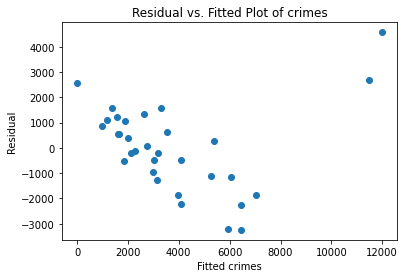

In [61]:
# plot 
plt.scatter(crimes_model.fittedvalues, crimes_model.resid)
# adding title and labels
plt.xlabel('Fitted crimes')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of crimes')
plt.show()

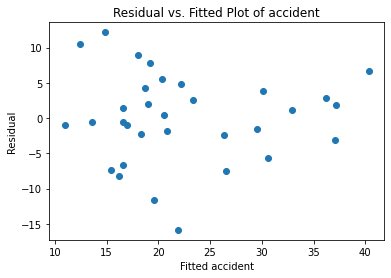

In [62]:
# plot 
plt.scatter(accident_model.fittedvalues, accident_model.resid)
# adding title and labels
plt.xlabel('Fitted accident')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of accident')
plt.show()

In [67]:
#是的，就这一句！
#误差项（errors）的期望均值为0
accident_model.resid.mean()


-1.3988810110276972e-14

In [66]:
crimes_model.resid.mean()

-7.688072400924284e-12